In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import PIL
import cv2

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

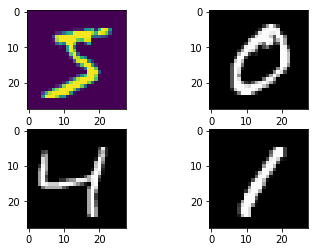

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [45]:
len(X_train)

60000

In [46]:
size = 128
color = [0, 0, 0]
new_X_train = []
new_X_test = []
old_size = X_train[0].shape[0]
new_size = size-old_size
top = bottom = right = left = new_size//2

In [47]:
#for i in range(len(X_train)):
#    new_X_train.append(cv2.copyMakeBorder(X_train[i], top, bottom, left, right, cv2.BORDER_CONSTANT, value=color))

In [48]:
from numba import jit

In [49]:
@jit
def training():
    for i in range(len(X_train)):
        new_X_train.append(cv2.copyMakeBorder(X_train[i], top, bottom, left, right, cv2.BORDER_CONSTANT, value=color))

In [50]:
training()

In [51]:

@jit
def testing():
    for i in range(len(X_test)):
        new_X_test.append(cv2.copyMakeBorder(X_test[i], top, bottom, left, right, cv2.BORDER_CONSTANT, value=color))

In [52]:
testing()

In [53]:
type(new_X_train)

list

In [54]:
X_train = np.array(new_X_train, dtype=np.uint8)

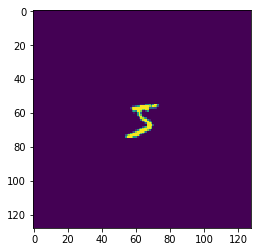

In [55]:
plt.imshow(new_X_train[0])

In [56]:
X_test = np.array(new_X_test, dtype=np.uint8)

In [57]:
#training()
#from numba import cuda
#print(cuda.gpus)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train = X_train.reshape(new_X_train.shape[0],128,128,1)
X_test = X_test.reshape(new_X_test.shape[0],128,128,1)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(kernel_size = (3,3), filters = 16, input_shape = (128,128,1), activation = 'relu', name = 'Input-layer'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 1, name = 'MaxPool-1'))

model.add(Conv2D(kernel_size = (3,3), filters = 32, activation = 'relu', name = 'Convolution-1'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 1, name = 'MaxPool-2'))

model.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu', name = 'Convolution-2'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 1, name = 'MaxPool-3'))

model.add(Conv2D(kernel_size = (3,3), filters = 32, activation = 'relu', name = 'Convolution-3'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 1, name = 'MaxPool-4'))

model.add(Conv2D(kernel_size = (3,3), filters = 16, activation = 'relu', name = 'Convolution-4'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 1, name = 'MaxPool-5'))

model.add(Flatten(name='Flatten-1'))
model.add(Dense(128, activation = 'relu', name = 'Dense-1'))
model.add(Dense(10, activation = 'softmax', name = 'Output'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-layer (Conv2D)         (None, 126, 126, 16)      160       
_________________________________________________________________
MaxPool-1 (MaxPooling2D)     (None, 125, 125, 16)      0         
_________________________________________________________________
Convolution-1 (Conv2D)       (None, 123, 123, 32)      4640      
_________________________________________________________________
MaxPool-2 (MaxPooling2D)     (None, 122, 122, 32)      0         
_________________________________________________________________
Convolution-2 (Conv2D)       (None, 120, 120, 64)      18496     
_________________________________________________________________
MaxPool-3 (MaxPooling2D)     (None, 119, 119, 64)      0         
_________________________________________________________________
Convolution-3 (Conv2D)       (None, 117, 117, 32)      18464     
__________

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=64,
            epochs=3,
            verbose=1,
            validation_split=0.10,
            validation_data=(X_test,y_test),
            )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3913s 65ms/step - loss: 0.3644 - acc: 0.9261 - val_loss: 0.0666 - val_acc: 0.9789
Epoch 2/3
60000/60000 [==============================] - 3921s 65ms/step - loss: 0.0636 - acc: 0.9799 - val_loss: 0.0711 - val_acc: 0.9781
Epoch 3/3
60000/60000 [==============================] - 3931s 66ms/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0620 - val_acc: 0.9824


In [30]:
model.save('mnist_model_128px')

In [ ]:
model = keras.models.load_model('mnist_model_128px')

In [59]:
#color = [0, 0, 0]
#new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

In [60]:
#new_img

array([9])

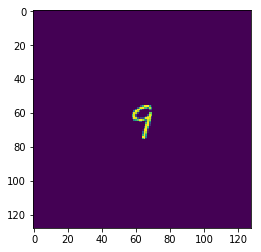

In [70]:
plt.imshow(X_test[7700])
model.predict_classes(X_test[7700].reshape(-1,128,128,1))